# Financial Planning - A Demonstration of **API's**

### Part 0 - Preparation

In [88]:
# Load in the required imports and packages
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
    # Unable to install MCForecastTools - going to need an alternative MC Package
    # from MCForecastTools import MCSimulation
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement MCForecastTools (from versions: none)
ERROR: No matching distribution found for MCForecastTools


In [9]:
# Determine the current working enviroment
os.getcwd()

'/Users/CamGould/Documents/FinTech Bootcamp/Unit_5_APIs'

In [10]:
# Load in the enviroment variables
load_dotenv()

True

### Part 1 - Personal Fianance Planner 

#### Collect cryptocurrency prices using the *requests* library

In [11]:
# Set the amount of each cryptocurrency being held
my_btc = 1.2 
my_eth = 5.3

In [12]:
# Fetch the crypto prices using the Alternative Free Crypto API
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [23]:
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19050337,
            "total_supply": 19050337,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 29275.0,
                    "volume_24h": 32078622536,
                    "market_cap": 559066076344,
                    "percentage_change_1h": -0.848762175078363,
                    "percentage_change_24h": -1.18920776999423,
                    "percentage_change_7d": -3.64506967098255,
                    "percent_change_1h": -0.848762175078363,
                    "percent_change_24h": -1.18920776999423,
                    "percent_change_7d": -3.64506967098255
                },
                "CAD": {
                    "price": 37398.8125,
                    "volume_24h": 40980440289.74,
                   

In [19]:
# Call in the current prices of each crypto and figure out value of the holding 
btc_price = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
btc_value = my_btc * btc_price
eth_price = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
eth_value = my_eth * eth_price

# Print the current value of the holding
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f} CAD")

The current value of your 1.2 BTC is $44929.16 CAD
The current value of your 5.3 ETH is $12187.76 CAD


#### Collect data on investments through Alpaca - *SPY (Stocks)* and *AGG (Bonds)*

In [24]:
# Set the current amount of shares held 
my_agg = 200
my_spy = 50

In [26]:
# Call in Alpaca Key and Alpaca Secret Key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the API object from Alpaca
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2022-05-25", tz="America/Toronto").isoformat()

# Set the investment tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_invest = api.get_bars( tickers, timeframe, start=today, end=today,).df

# Drop the time component of the date
df_invest.index = df_invest.index.date

# Preview DataFrame
df_invest.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
2022-05-25,103.93,104.07,103.765,104.04,7713778,31975,103.913300,AGG
2022-05-25,392.36,399.45,391.890,397.37,91073759,763631,395.782204,SPY


In [49]:
# Find the last close prices for each investment 
agg_price = df_invest.iat[0, 3]
spy_price = df_invest.iat[1, 3]

In [50]:
# Compute the current value of each investment and print the dollar amount agg_value = my_agg * agg_close_price 
agg_value = my_agg * agg_price 
spy_value = my_spy * spy_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19868.50
The current value of your 200 AGG shares is $20808.00


#### Savings Health Analysis

In [64]:
# Create a variable for monthly income 
monthly_income = 12000

# Create variables for total of each type of investment 
crypto_value = btc_value + eth_value
shares_value = agg_value + eth_value
values = {'Amount': [crypto_value, shares_value]}

# Use the above to create a dataframe using Pandas 
holdings = pd.DataFrame(values, index = ['Crypto', 'Shares'])
holdings

,Amount
Crypto,57116.920245
Shares,32995.756245


<AxesSubplot:title={'center':'Weightage of Holdings'}, ylabel='Amount'>

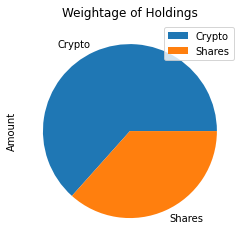

In [65]:
# Create a pie chart to show weight of holdings
holdings.plot.pie(y = 'Amount', title = 'Weightage of Holdings')

In [70]:
# Determine the ideal emergency fund
emergency = monthly_income * 3

# Calculate the total value of all holdings 
total_holdings = crypto_value + shares_value 

# Determine the health of savings 
if emergency < total_holdings:
        print("Congratuations! You have enough money in this fund.")
elif emergency == total_holdings:
        print("Congratulations! You have reached the financial goal for this fund")
else:
        print(f"You are {emergency - total_holdings} dollars away from reaching the goal of this fund")

Congratuations! You have enough money in this fund.


### Part 2 - Retirement Planning 

In [71]:
# Set the start and end dates as five years back
start_date = pd.Timestamp('2017-05-25', tz='America/Toronto').isoformat()
end_date = pd.Timestamp('2022-05-25', tz='America/Toronto').isoformat()

In [87]:
# Get 5 years' worth of historical data for SPY and AGG

# Have to use get_bars - have to make seperate dataframes than merge 

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-25", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.index = df_ticker.index.date
df_ticker.tail()

# Reorganize the DataFrame

# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.head()

SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-05-25  241.22  242.08  240.96  241.76  64071661      207256  241.619639   
2017-05-26  241.59  241.90  241.45  241.71  46629905      136786  241.717064   
2017-05-30  241.32  241.79  241.16  241.50  35201897      135969  241.537343   
2017-05-31  241.84  241.88  240.64  241.44  91796016      242045  241.299649   
2017-06-01  241.97  243.38  241.64  243.36  68962024      230844  242.569940   

               AGG                                                             
              open    high       low   close   volume trade_count        vwap  
2017-05-25  109.45  109.49  109.3701  109.48  1558065        6828  109.453459  
2017-05-26  109.46  109.54  109.4400  109.44   955267        4751  109.481904  
2017-05-30  109.58  109.66  109.5400  109.65  2093241        6879  109.622057  
2017-05-31  109.64  109.81  109.6400  109.76  2416515       11433  109.746978  
2017-06-01  109.36  109.50  109.3409  109.48  2454539       11374  109.447306

In [89]:
# Try and find a substitute for MCForecastTools

# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

class MCSimulation:
    """
    A Python class for runnning Monte Carlo simulation on portfolio price data. 
    
    ...
    
    Attributes
    ----------
    portfolio_data : pandas.DataFrame
        portfolio dataframe
    weights: list(float)
        portfolio investment breakdown
    nSim: int
        number of samples in simulation
    nTrading: int
        number of trading days to simulate
    simulated_return : pandas.DataFrame
        Simulated data from Monte Carlo
    confidence_interval : pandas.Series
        the 95% confidence intervals for simulated final cumulative returns
        
    """
    
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        """
        Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
        """
        
        # Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data.xs('close',level=1,axis=1).pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [90]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns from 500 runs with a 40/60 split

MC_30 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [91]:
# Show the simulation input data
MC_30.portfolio_data.head()

SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-05-25  241.22  242.08  240.96  241.76  64071661      207256  241.619639   
2017-05-26  241.59  241.90  241.45  241.71  46629905      136786  241.717064   
2017-05-30  241.32  241.79  241.16  241.50  35201897      135969  241.537343   
2017-05-31  241.84  241.88  240.64  241.44  91796016      242045  241.299649   
2017-06-01  241.97  243.38  241.64  243.36  68962024      230844  242.569940   

                            AGG                                     \
           daily_return    open    high       low   close   volume   
2017-05-25          NaN  109.45  109.49  109.3701  109.48  1558065   
2017-05-26    -0.000207  109.46  109.54  109.4400  109.44   955267   
2017-05-30    -0.000869  109.58  109.66  109.5400  109.65  2093241   
2017-05-31    -0.000248  109.64  109.81  109.6400  109.76  2416515   
2017-06-01     0.007952  109.36  109.50  109.3409  109.48  2454539   

                                                 
           trade_count        vwap daily_return  
2017-05-25        6828  109.453459          NaN  
2017-05-26        4751  109.481904    -0.000365  
2017-05-30        6879  109.622057     0.001919  
2017-05-31       11433  109.746978     0.001003  
2017-06-01       11374  109.447306    -0.002551

In [92]:
# Running a Monte Carlo simulation to forecast thirty years of cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/CamGould/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997716,0.997050,1.007433,1.000612,0.994331,1.001850,0.991759,1.013683,0.996871,1.002156,...,1.000585,1.002008,1.005683,1.002171,1.001305,0.982642,1.006738,1.002125,1.008688,1.004995
2,0.996386,0.998762,1.018103,0.997994,0.990450,0.998125,0.998867,1.005015,1.006879,0.999873,...,1.000319,1.006178,1.014747,0.998558,0.991275,0.974981,1.020080,0.998778,1.017018,1.018282
3,0.993080,0.991646,1.034308,0.996316,0.997522,0.997182,1.007906,1.007524,1.002289,1.003355,...,0.996903,0.996932,1.016530,0.999354,1.010487,0.973340,1.032482,1.001246,1.019065,1.010392
4,1.001923,1.001386,1.032309,0.987257,0.990164,0.998137,1.008803,1.006026,0.995344,1.000320,...,0.993541,0.988014,1.034478,1.002654,1.007175,0.968226,1.024972,0.996415,1.012798,1.013896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.601715,2.498135,4.176339,4.014139,6.973470,4.853879,3.260317,10.173919,17.047725,19.688810,...,1.918854,5.242490,4.742265,4.250205,7.999987,5.935453,6.372494,1.685510,12.890298,2.431775
7557,7.525720,2.491002,4.193427,3.968886,7.013479,4.849883,3.258579,10.018327,16.891182,19.883189,...,1.927959,5.299965,4.770356,4.311268,7.946726,5.981509,6.383657,1.680914,12.828304,2.443111
7558,7.405084,2.475427,4.166725,3.999076,7.152924,4.841867,3.223120,10.048060,16.744801,19.834012,...,1.929097,5.339360,4.685812,4.268362,7.937349,5.921179,6.420359,1.665898,12.939554,2.449999
7559,7.424853,2.454343,4.112086,4.032917,7.277965,4.810853,3.236053,9.971524,16.927313,19.549425,...,1.954960,5.338045,4.715823,4.275150,7.976520,5.911152,6.476180,1.675139,13.072869,2.470494


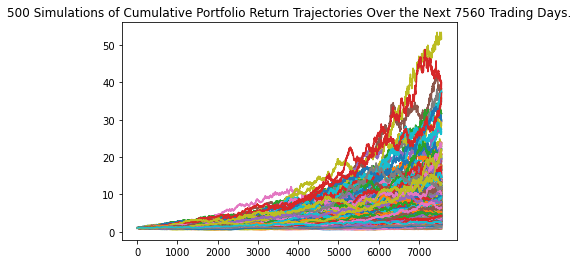

In [100]:
# Display the outcome of the montecarlo simulation 
MC_plot = MC_30.plot_simulation()

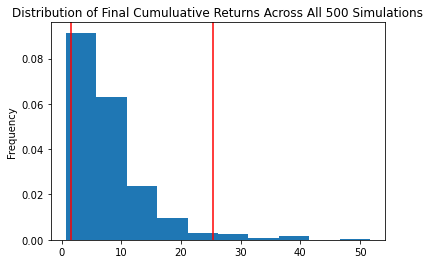

In [97]:
# Show the probibility distribution and confidence intervals 
PD_plot = MC_30.plot_distribution()

### Part 3 - Retirement Analysis

In [98]:
# Display the summary statistics from the Monte Carlo simulation results
Sum_Stats = MC_30.summarize_cumulative_return()
# Print summary statistics
print(Sum_Stats)

count           500.000000
mean              7.935115
std               6.431208
min               0.710127
25%               3.778526
50%               5.984189
75%               9.816501
max              51.689063
95% CI Lower      1.630057
95% CI Upper     25.355472
Name: 7560, dtype: float64


In [101]:
# Calculate the expected portfolio return 

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_low = round(Sum_Stats[8]*20000,2)
ci_up = round(Sum_Stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end up with a dollar amount within in the range of"
      f" ${ci_low} and ${ci_up}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end up with a dollar amount within in the range of $32601.15 and $507109.45


In [105]:
# Calculate the expected portfolio return if the initial investment increases by 50% 

# Set initial investment
initial_investment = 20000*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_low2 = round(Sum_Stats[8]*30000,2)
ci_up2 = round(Sum_Stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that if we increase the initial investment of ${initial_investment} by 50%,"
      f" after 30 years, we will end up with a dollar amount within in the range of"
      f" ${ci_low2} and ${ci_up2}")

There is a 95% chance that if we increase the initial investment of $30000.0 by 50%, after 30 years, we will end up with a dollar amount within in the range of $48901.72 and $760664.17
